In [1]:
import tensorflow as tf
from keras.datasets import mnist

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

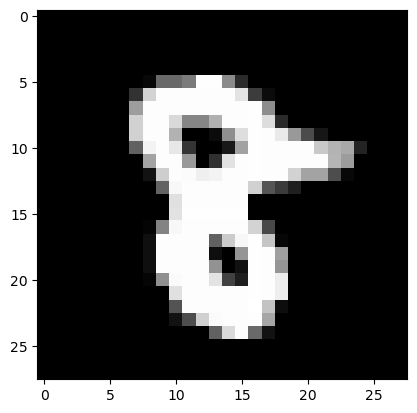

In [5]:
plt.imshow(x_train[2400], cmap= 'gray')

In [6]:
y_train[2400]

8

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
# formula for normalization = (x - xmin)/(xmax - xmin)

In [9]:
x_train = x_train/255
x_test = x_test/255

# build the neural n/w

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(filters=32, input_shape = (28,28,1), kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())


model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()
# compile and train


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [14]:
model.compile(loss = 'sparse_cateogorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
# x_train = np.expand_dims(x_train, axis=-1)
# 

In [16]:
model.fit(x_train, y_train, batch_size=10, epochs=3)


Epoch 1/3


ValueError: in user code:

    File "C:\Users\mihik\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\mihik\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mihik\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\mihik\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\mihik\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "C:\Users\mihik\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 252, in __call__
        self.build(y_pred)
    File "C:\Users\mihik\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 194, in build
        self._losses = tf.nest.map_structure(
    File "C:\Users\mihik\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 365, in _get_loss_object
        loss = losses_mod.get(loss)
    File "C:\Users\mihik\anaconda3\Lib\site-packages\keras\src\losses.py", line 2965, in get
        return deserialize(identifier, use_legacy_format=use_legacy_format)
    File "C:\Users\mihik\anaconda3\Lib\site-packages\keras\src\losses.py", line 2912, in deserialize
        return legacy_serialization.deserialize_keras_object(
    File "C:\Users\mihik\anaconda3\Lib\site-packages\keras\src\saving\legacy\serialization.py", line 537, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'sparse_cateogorical_crossentropy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


# EVALUATE ON TEST DATA

In [ ]:
model.evaluate(x_test, y_test, batch_size=1)